In [1]:
suppressMessages(source("../config_sing.R"))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


In [4]:
dat_mtf_nr20_per1 = dat_mtf_nr20 %>% dplyr::filter(Start >= 8148000, End <= 8160000)
dat_mtf_nr20_per1

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,8150232,8150246,NR/20,8.32560
chr17,8150831,8150845,NR/20,7.34290
chr17,8151912,8151926,NR/20,11.86410
chr17,8154459,8154474,NR/20,15.34770
chr17,8154760,8154775,NR/20,8.20005


## Library size

In [5]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp")     
fname = "dat_libsize.tsv"
fpath = file.path(fdiry, fname)

###
fun = function(x){exp(mean(log(x)))}
dat = read_tsv(fpath, show_col_types = FALSE)

###
dat_lib_f00 = dat
print(dim(dat))
dat

[1] 18  3


Sample,Group,Size
<chr>,<chr>,<dbl>
Input1,Input,12361285
Input1_20x,Input_20x,258504625
Input2,Input,13353781
Input2_20x,Input_20x,241310871
Input3,Input,15549291
Input3_20x,Input_20x,244400402
Input4,Input,12493205
Input4_20x,Input_20x,283480692
Input5,Input,10033023


In [6]:
fdiry = file.path(FD_RES, "sliding_window", "sliding_chr17_len_1kb_gap_100bp_f50_OR_F50")     
fname = "dat_libsize.tsv"
fpath = file.path(fdiry, fname)

###
fun = function(x){exp(mean(log(x)))}
dat = read_tsv(fpath, show_col_types = FALSE)

###
dat_lib_f50 = dat
print(dim(dat))
dat

[1] 18  3


Sample,Group,Size
<chr>,<chr>,<dbl>
Input1,Input,6401682
Input1_20x,Input_20x,133509811
Input2,Input,6915620
Input2_20x,Input_20x,124654780
Input3,Input,8051137
Input3_20x,Input_20x,126243490
Input4,Input,6465460
Input4_20x,Input_20x,146376882
Input5,Input,5189219


## import coverage

In [7]:
SAMPLES = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

In [8]:
###
WINDOW="sliding_chr17_len_1kb_gap_100bp"
dat_lib = dat_lib_f00

###
cname = c("Chrom", "Start", "End", "Count")
ctype = c(col_character(), col_integer(), col_integer(), col_integer())
fname = "target_PER1_coverage.bed.gz"

###
lst = lapply(SAMPLES, function(SAMPLE){
    
    ### set file path
    fdiry = file.path(FD_RES, "sliding_window", WINDOW, SAMPLE)     
    fpath = file.path(fdiry, fname)
    
    ### import data
    dat = read_tsv(fpath, col_types = ctype, col_names = cname)
    dat$Sample = SAMPLE
    
    ### check empty and assign zero
    dat = dat %>% 
        replace(.==".", "0") %>% 
        mutate(Count = as.integer(Count))
    return(dat)
})

###
dat = bind_rows(lst)
dat = dat %>% left_join(dat_lib, by="Sample") %>%
    mutate(CPM = Count * 10^6 / Size)

###
dat_cov_f00 = dat
print(dim(dat))
head(dat)

[1] 216018      8


Chrom,Start,End,Count,Sample,Group,Size,CPM
<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
chr17,8148000,8148001,189,Input1,Input,12361285,15.28967
chr17,8148001,8148002,189,Input1,Input,12361285,15.28967
chr17,8148002,8148003,189,Input1,Input,12361285,15.28967
chr17,8148003,8148004,189,Input1,Input,12361285,15.28967
chr17,8148004,8148005,189,Input1,Input,12361285,15.28967
chr17,8148005,8148006,189,Input1,Input,12361285,15.28967


In [9]:
###
WINDOW="sliding_chr17_len_1kb_gap_100bp_f50_OR_F50"
dat_lib = dat_lib_f50


###
cname = c("Chrom", "Start", "End", "Count")
ctype = c(col_character(), col_integer(), col_integer(), col_integer())
fname = "target_PER1_coverage.bed.gz"

###
lst = lapply(SAMPLES, function(SAMPLE){
    
    ### set file path
    fdiry = file.path(FD_RES, "sliding_window", WINDOW, SAMPLE)   
    fpath = file.path(fdiry, fname)
    
    ### import data
    dat = read_tsv(fpath, col_types = ctype, col_names = cname)
    dat$Sample = SAMPLE
    
    ### check empty and assign zero
    dat = dat %>% 
        replace(.==".", "0") %>% 
        mutate(Count = as.integer(Count))
    return(dat)
})

###
dat = bind_rows(lst)
dat = dat %>% 
    left_join(dat_lib, by="Sample") %>%
    mutate(CPM = Count * 10^6 / Size)

###
dat_cov_f50 = dat
print(dim(dat))
head(dat)

[1] 216018      8


Chrom,Start,End,Count,Sample,Group,Size,CPM
<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>
chr17,8148000,8148001,125,Input1,Input,6401682,19.52612
chr17,8148001,8148002,125,Input1,Input,6401682,19.52612
chr17,8148002,8148003,125,Input1,Input,6401682,19.52612
chr17,8148003,8148004,125,Input1,Input,6401682,19.52612
chr17,8148004,8148005,125,Input1,Input,6401682,19.52612
chr17,8148005,8148006,125,Input1,Input,6401682,19.52612


## summarize

In [10]:
### calculate stats for each location
dat = dat_cov_f00
dat = dat %>% 
    group_by(Chrom, Start, End, Group) %>% 
    summarise(
        CPM_Mean = mean(CPM),
        CPM_Std  = sd(CPM),
        .groups = "drop") %>%
    mutate(
        CPM_Up = CPM_Mean + CPM_Std,
        CPM_Dw = CPM_Mean - CPM_Std)

### assign and show
dat_sum_f00 = dat
print(dim(dat))
head(dat)

[1] 48004     8


Chrom,Start,End,Group,CPM_Mean,CPM_Std,CPM_Up,CPM_Dw
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8148001,Input,22.49249,4.579728,27.07222,17.91276
chr17,8148000,8148001,Input_20x,32.01867,2.160945,34.17961,29.85772
chr17,8148000,8148001,TFX_Dex,20.42909,9.501209,29.93030,10.92788
chr17,8148000,8148001,TFX_DMSO,29.37684,6.370025,35.74687,23.00682
chr17,8148001,8148002,Input,22.49249,4.579728,27.07222,17.91276
chr17,8148001,8148002,Input_20x,32.01867,2.160945,34.17961,29.85772


In [11]:
### calculate stats for each location
dat = dat_cov_f50
dat = dat %>% 
    group_by(Chrom, Start, End, Group) %>% 
    summarise(
        CPM_Mean = mean(CPM),
        CPM_Std  = sd(CPM),
        .groups = "drop") %>%
    mutate(
        CPM_Up = CPM_Mean + CPM_Std,
        CPM_Dw = CPM_Mean - CPM_Std)

### assign and show
dat_sum_f50 = dat
print(dim(dat))
head(dat)

[1] 48004     8


Chrom,Start,End,Group,CPM_Mean,CPM_Std,CPM_Up,CPM_Dw
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr17,8148000,8148001,Input,24.56107,4.345935,28.90700,20.21513
chr17,8148000,8148001,Input_20x,35.30252,3.022681,38.32520,32.27984
chr17,8148000,8148001,TFX_Dex,21.66224,11.451511,33.11375,10.21073
chr17,8148000,8148001,TFX_DMSO,32.32949,6.126590,38.45608,26.20290
chr17,8148001,8148002,Input,24.56107,4.345935,28.90700,20.21513
chr17,8148001,8148002,Input_20x,35.30252,3.022681,38.32520,32.27984


## Visualize coverage (different groups)

In [12]:
dat_mtf_nr20_per1

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,8150232,8150246,NR/20,8.32560
chr17,8150831,8150845,NR/20,7.34290
chr17,8151912,8151926,NR/20,11.86410
chr17,8154459,8154474,NR/20,15.34770
chr17,8154760,8154775,NR/20,8.20005


**Input**

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


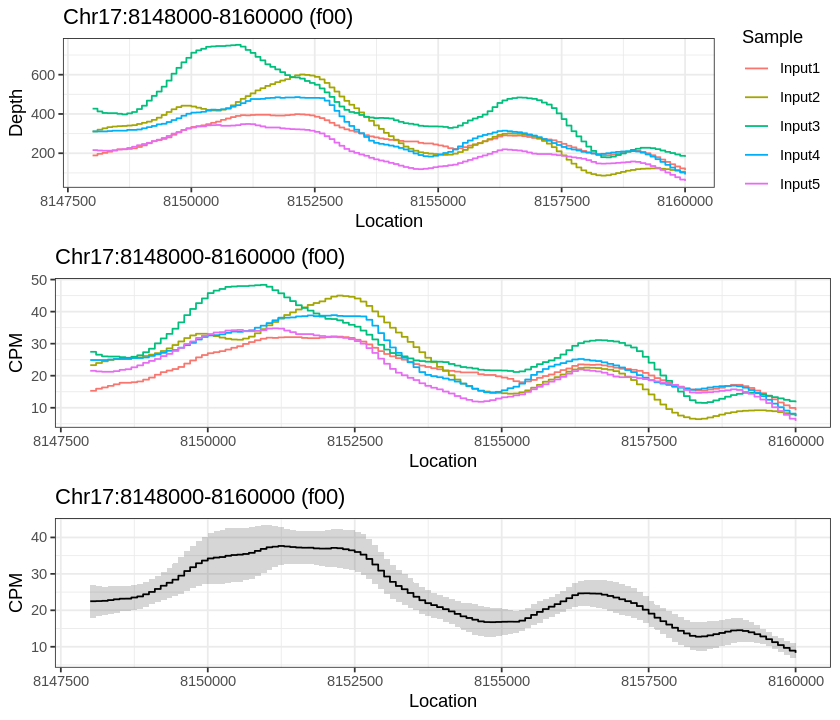

In [17]:
###
group = "Input"
dat_cov = dat_cov_f00 %>% mutate(Loc = Start)
dat_sum = dat_sum_f00 %>% mutate(Loc = Start)

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

df3 = dat_mtf_nr20_per1

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000 (f00)", x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000 (f00)", x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title="Chr17:8148000-8160000 (f00)", x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


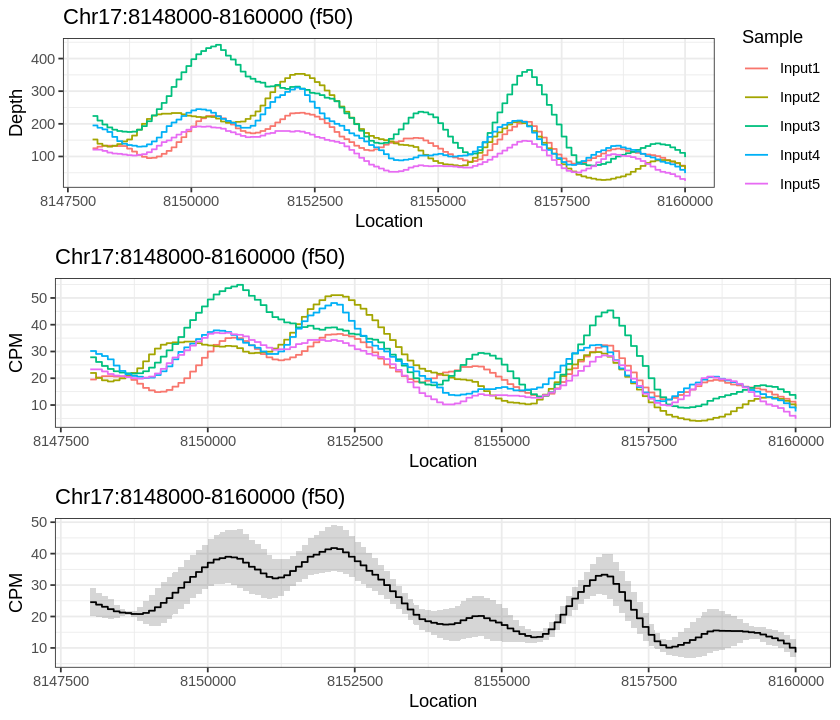

In [18]:
###
group = "Input"
dat_cov = dat_cov_f50 %>% mutate(Loc = Start)
dat_sum = dat_sum_f50 %>% mutate(Loc = Start)

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000 (f50)", x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000 (f50)", x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title="Chr17:8148000-8160000 (f50)", x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

**Input_20x**

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


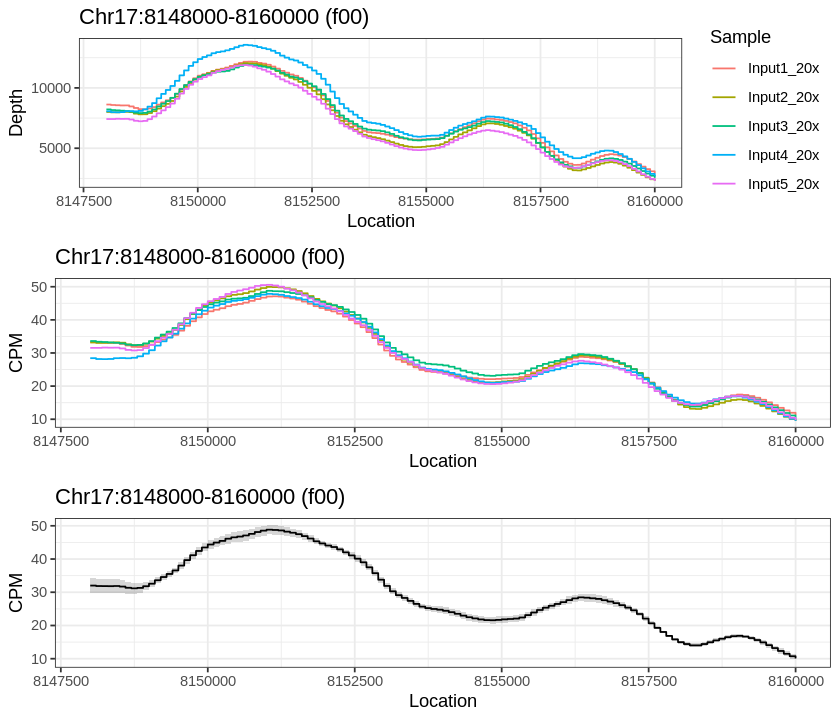

In [19]:
###
group = "Input_20x"
dat_cov = dat_cov_f00 %>% mutate(Loc = Start)
dat_sum = dat_sum_f00 %>% mutate(Loc = Start)
txt = "Chr17:8148000-8160000 (f00)"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


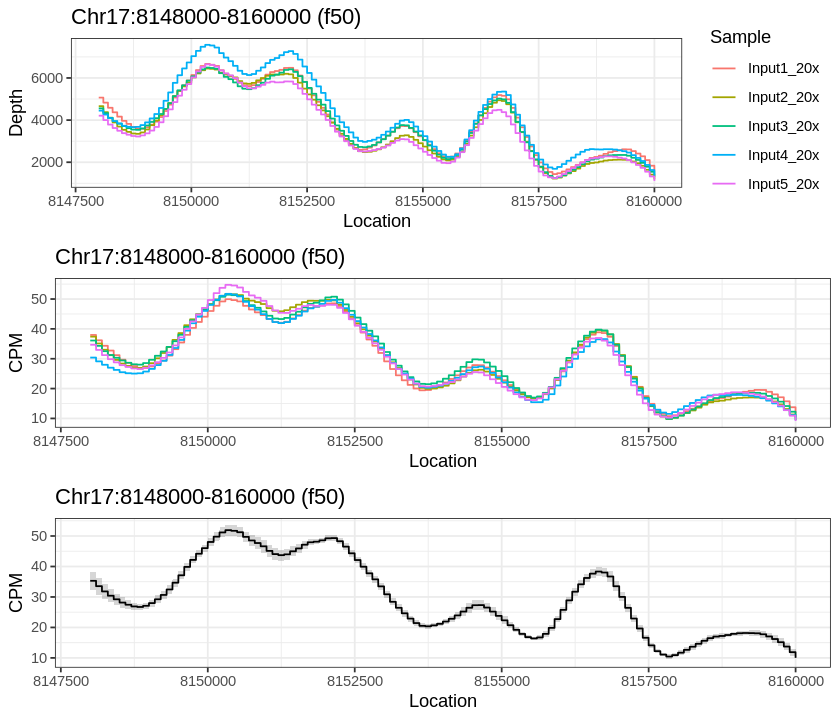

In [21]:
###
group = "Input_20x"
dat_cov = dat_cov_f50 %>% mutate(Loc = Start)
dat_sum = dat_sum_f50 %>% mutate(Loc = Start)
txt = "Chr17:8148000-8160000 (f50)"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

**TFX_DMSO**

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


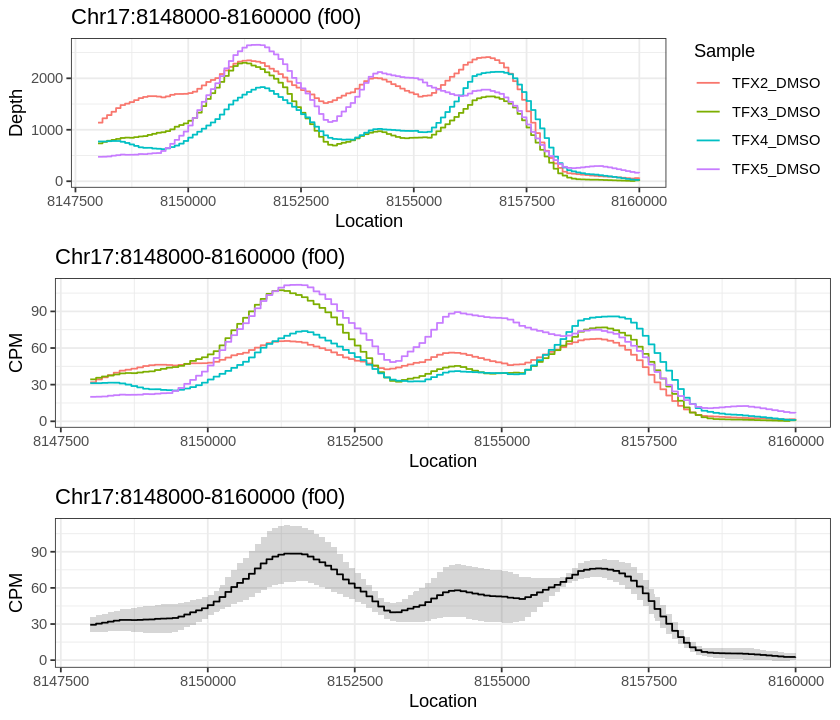

In [22]:
###
group = "TFX_DMSO"
dat_cov = dat_cov_f00 %>% mutate(Loc = Start)
dat_sum = dat_sum_f00 %>% mutate(Loc = Start)
txt = "Chr17:8148000-8160000 (f00)"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


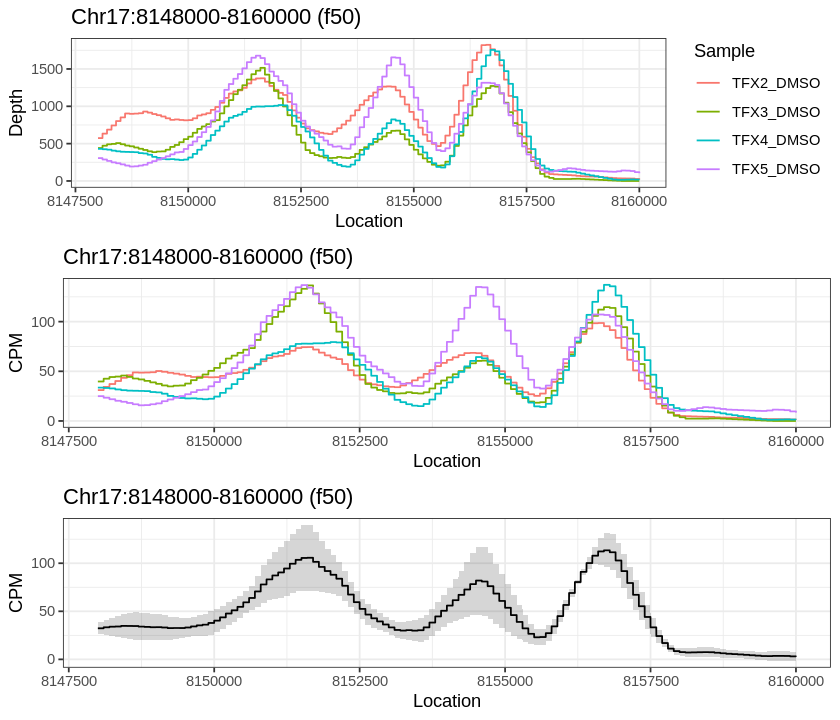

In [23]:
###
group = "TFX_DMSO"
dat_cov = dat_cov_f50 %>% mutate(Loc = Start)
dat_sum = dat_sum_f50 %>% mutate(Loc = Start)
txt = "Chr17:8148000-8160000 (f50)"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

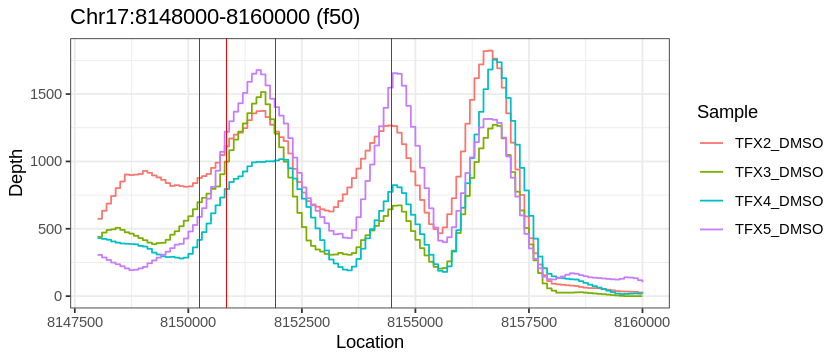

In [22]:
###
group = "TFX_DMSO"
dat_cov = dat_cov_f50 %>% mutate(Loc = Start)
dat_sum = dat_sum_f50 %>% mutate(Loc = Start)
txt = "Chr17:8148000-8160000 (f50)"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

#options(repr.plot.height=6, repr.plot.width=7)
#plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")
options(repr.plot.height=3, repr.plot.width=10)
gp1 + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax =  Inf,
         fill = "red")

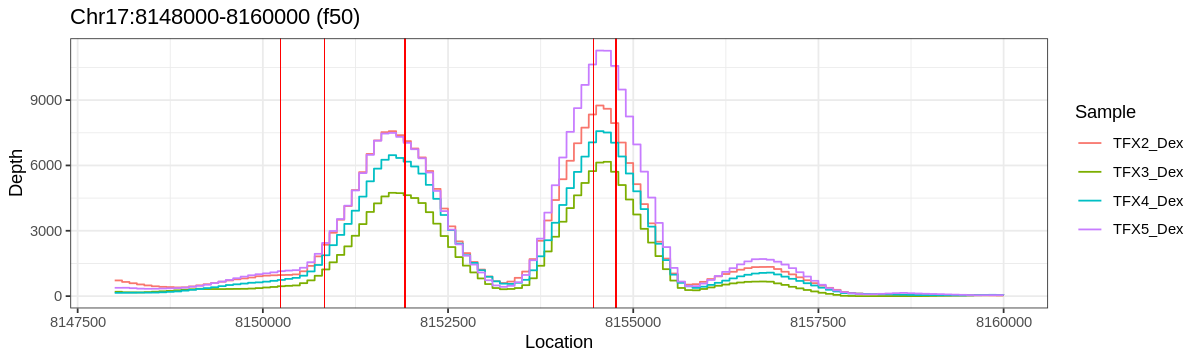

In [25]:
###
group = "TFX_Dex"
dat_cov = dat_cov_f50 %>% mutate(Loc = Start)
dat_sum = dat_sum_f50 %>% mutate(Loc = Start)
txt = "Chr17:8148000-8160000 (f50)"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title=txt, x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

#options(repr.plot.height=6, repr.plot.width=7)
#plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")
options(repr.plot.height=3, repr.plot.width=10)
gp1 + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax =  Inf,
         fill = "red")

In [26]:
dat_mtf

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,8150232,8150246,NR/20,8.32560
chr17,8150831,8150845,NR/20,7.34290
chr17,8151912,8151926,NR/20,11.86410
chr17,8154459,8154474,NR/20,15.34770
chr17,8154760,8154775,NR/20,8.20005
